In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
sys.path.append ('/home/angel/Documents/Angel/Projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint

# Matplotlib options
%matplotlib inline
#mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [3]:
json_file1='../Test_Systems/Pharmacophores/Set02/ZINCpharmer.json'
json_file2='../Test_Systems/Pharmacophores/Set02/pharmit.json'
json_file3='../Test_Systems/Pharmacophores/Set01/gold_soln_l2199_3D_H_Ch_m1_4.json'

In [4]:
ph3=json.loads(open(json_file3).read())
ph2=json.loads(open(json_file2).read())
ph1=json.loads(open(json_file1).read())

In [5]:
tmp_json_keys = ph2.keys ()
tmp_json = ph2

## Extracting descriptors and vectors

descriptors_list={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

if 'points' in tmp_json_keys:
    
                descriptors=[]
        
                for json_object in tmp_json.get ('points'):
                    
                
                    if json_object.get ('enabled')==True:
                        name=descriptors_list[json_object.get ('name')]
                        vector=json_object.get ('vector')
                        vector_on=json_object.get ('vector_on')
                        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==1:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                        element['x'], element['y'],element['z']])
                                descriptors.append (descriptor)
        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==0:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                descriptors.append (descriptor)
                           
                        if 'vector' and not 'vector_on' in json_object.keys ():
                            if vector!=None:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                element['x'], element['y'],element['z']])
                                descriptors.append (descriptor)
                            if vector==None:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                descriptors.append (descriptor)
                                
                descriptors.append (descriptor)
                points=np.array (descriptors)
                pprint (point)

## Extracting descriptors and svectors 
(mistake; we need vectors)

descriptors={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

descriptors=[]
for point in ph2.get ('points'):
    if point.get ('enabled')==False:
        if 'svector' in point.keys ():
            svector=point.get ('svector')
            if svector!=None:
                name=descriptors[point.get('name')]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'), 
                    svector.get('x'),svector.get('y'),svector.get('z')])
            if svector== None:
                svector=[0]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'),
                    svector[0],svector[0],svector[0]])

## Testing the library

In [6]:
data=phr.Descriptors (input_file=json_file1,select='enabled')

In [7]:
data.points

array([[  3.        ,  -3.1847    , -14.2224    ,  18.3293    ,
          0.5       ,   0.64943987,  -0.47824431,  -0.5911939 ],
       [  3.        ,  -3.3217    , -13.4932    ,  17.2042    ,
          0.5       ,  -0.89052606,   0.31331907,   0.32984011],
       [  2.        ,  -0.2209    , -12.3666    ,  18.5766    ,
          0.5       ,  -0.19773042,   0.94888152,   0.24602144],
       [  2.        ,   1.3278    , -10.176     ,  19.1609    ,
          0.5       ,   0.48791278,   0.86678469,  -0.10307971],
       [  2.        ,   3.4643    , -10.5068    ,  19.7539    ,
          0.5       ,  -0.19347113,   0.93915728,  -0.28381776],
       [  1.        ,  -4.1716    , -15.224     ,  18.6533    ,
          1.        ,   0.        ,   0.        ,   0.        ],
       [  1.        ,  -4.1716    , -15.224     ,  18.6533    ,
          1.        ,   0.        ,   0.        ,   0.        ]])

In [8]:
Hyd= [[],[],[]]
HA=[[],[],[]]
HD= [[],[],[]]
Ar=[[],[],[]]
for element in data.points:
    if element[0]==1.0:
        Hyd[0].append (element[1])
        Hyd[1].append (element[2])
        Hyd[2].append (element[3])
    if element[0]==2.0:
        HA[0].append (element[1])
        HA[1].append (element[2])
        HA[2].append (element[3])
    if element[0]==3.0:
        HD[0].append (element[1])
        HD[1].append (element[2])
        HD[2].append (element[3])
    if element[0]==4.0:
        Ar[0].append (element[1])
        Ar[1].append (element[2])
        Ar[2].append (element[3])

In [9]:
print (Hyd,HA,HD,Ar)

[[-4.1716, -4.1716], [-15.224, -15.224], [18.6533, 18.6533]] [[-0.2209, 1.3278, 3.4643], [-12.3666, -10.176, -10.5068], [18.5766, 19.1609, 19.7539]] [[-3.1847, -3.3217], [-14.2224, -13.4932], [18.3293, 17.2042]] [[], [], []]


<IPython.core.display.Javascript object>


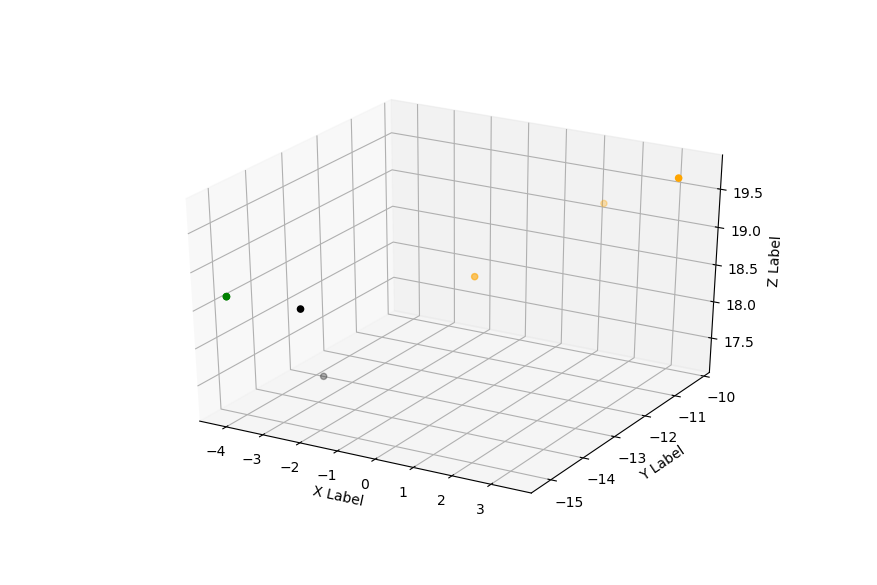

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Hyd[0],Hyd[1],Hyd[2], color='green')
ax.scatter(HA[0],HA[1],HA[2], color='orange')
ax.scatter(HD[0],HD[1],HD[2], color='black')
ax.scatter(Ar[0],Ar[1],Ar[2], color='purple')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Multiple files

In [11]:
template = '/home/angel/Dropbox/Doctorado/Experimentos/Pharmacophore_model_pharmer/pharmacophore_files/%s.json'
flist = [template % str(i) for i in range(1,61)]

In [12]:
Hyd= [[],[],[]]
HA = [[],[],[]]
HD = [[],[],[]]
Ar = [[],[],[]]
for file in flist:
    data=phr.Descriptors (input_file=file,select='enabled')
    for element in data.points:
        if element[0]==1.0:
            Hyd[0].append (element[1])
            Hyd[1].append (element[2])
            Hyd[2].append (element[3])
        if element[0]==2.0:
            HA[0].append (element[1])
            HA[1].append (element[2])
            HA[2].append (element[3])
        if element[0]==3.0:
            HD[0].append (element[1])
            HD[1].append (element[2])
            HD[2].append (element[3])
        if element[0]==4.0:
            Ar[0].append (element[1])
            Ar[1].append (element[2])
            Ar[2].append (element[3])

<IPython.core.display.Javascript object>


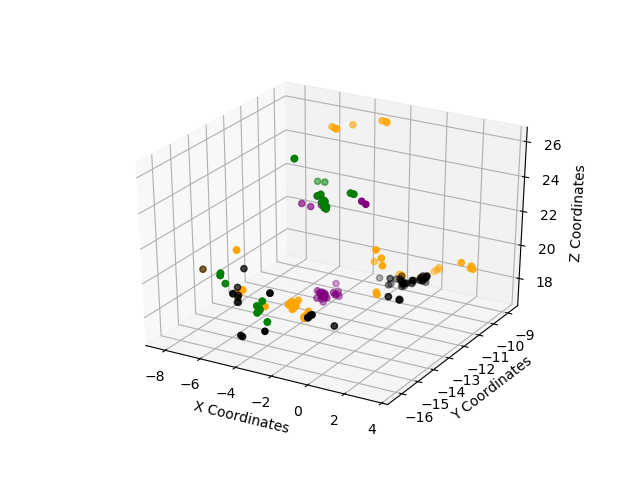

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Hyd[0],Hyd[1],Hyd[2], color='green')
ax.scatter(HA[0],HA[1],HA[2], color='orange')
ax.scatter(HD[0],HD[1],HD[2], color='black')
ax.scatter(Ar[0],Ar[1],Ar[2], color='purple')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.show()